In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from ripser import ripser, Rips
import stablerank.srank as sr

df1 = pd.read_csv('data/braincancer.csv')
df2 = pd.read_csv('data/breastcancer.csv')

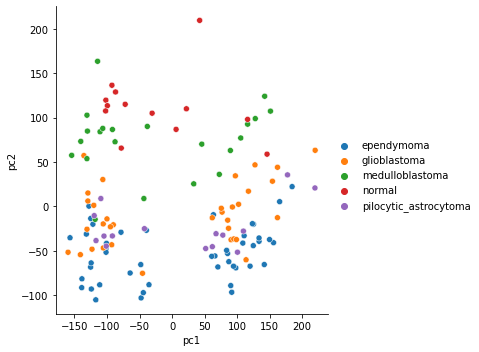

In [2]:
df = df1
X = df.drop(columns=['samples', 'type']).to_numpy()
labels = df['type'].to_numpy()
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
pca = PCA(n_components=130)
principal_components = pca.fit_transform(Xscaled)
pltdf = pd.DataFrame({'label': labels, 'pc1': principal_components[:, 0], 'pc2' : principal_components[:, 1]})
sns.relplot(data=pltdf, x='pc1', y='pc2', hue=labels)

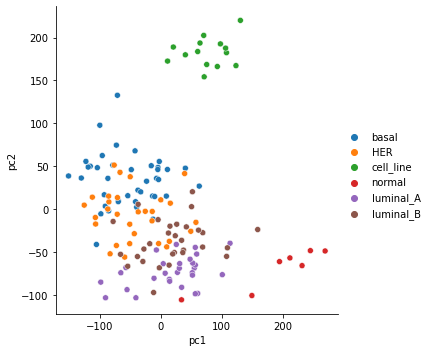

In [3]:
df = df2
X = df.drop(columns=['samples', 'type']).to_numpy()
labels = df['type'].to_numpy()
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
pca = PCA(n_components=130)
principal_components = pca.fit_transform(Xscaled)
pltdf = pd.DataFrame({'label': labels, 'pc1': principal_components[:, 0], 'pc2' : principal_components[:, 1]})
sns.relplot(data=pltdf, x='pc1', y='pc2', hue=labels)

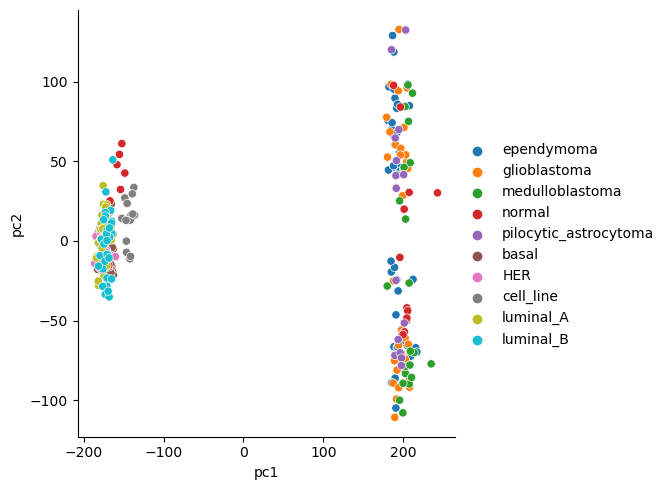

In [29]:
df = pd.concat([df1, df2])
X = df.drop(columns=['samples', 'type']).to_numpy()
labels = df['type'].to_numpy()
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
pca = PCA(n_components=130)
principal_components = pca.fit_transform(Xscaled)
pltdf = pd.DataFrame({'label': labels, 'pc1': principal_components[:, 0], 'pc2' : principal_components[:, 1]})
sns.relplot(data=pltdf, x='pc1', y='pc2', hue=labels)

In [26]:
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
102,936,normal,11.058354,7.938873,6.606813,8.665940,4.308291,7.267153,6.485517,6.625708,...,12.520958,11.760554,14.033720,13.866105,5.190382,4.625670,3.895986,3.555475,4.529254,4.541289
103,937,normal,10.891077,8.196186,6.882572,9.763854,6.689535,6.982140,7.144234,5.777428,...,11.863581,10.970631,13.485758,13.257828,5.582483,5.386739,4.043629,3.636652,4.482753,4.371177
104,938,normal,12.428312,7.860278,7.077833,8.938877,6.967024,7.689809,7.277855,5.515079,...,12.998057,12.408428,14.191433,14.035984,5.632215,4.727816,3.696424,3.625613,4.575635,5.094951
105,939,normal,11.607264,7.082855,7.394746,9.491669,7.109989,8.312357,7.142569,5.835907,...,12.272146,12.120658,13.695633,13.813283,5.904952,5.619512,4.547821,4.854368,4.852114,5.436919
106,940,normal,11.046641,8.458561,6.425059,8.770478,6.532255,7.132320,7.857738,5.823012,...,13.100610,12.697922,14.362506,14.061722,4.950459,4.612189,4.010441,3.866341,4.471244,4.766970
107,941,normal,10.701817,8.467377,6.946708,8.815156,6.970623,7.170153,7.732778,5.722184,...,13.129350,12.787868,14.317011,14.138459,5.278686,4.840622,4.034140,3.711081,4.755616,5.055751
108,942,normal,10.783854,8.369617,6.452944,8.783144,7.404503,7.208477,7.673639,5.725344,...,13.172185,12.774102,14.322308,14.148298,5.367982,4.915638,3.982503,3.870096,4.728565,4.795686
109,943,normal,12.536421,6.627878,6.974907,9.754692,5.434262,7.320907,6.289890,6.117296,...,12.643840,11.573833,13.977533,13.885077,5.169850,5.011484,4.188489,3.563915,4.336722,4.455248
110,944,normal,11.299893,8.286180,6.993723,8.770720,4.026220,7.585630,7.870659,5.819242,...,13.276996,12.869971,14.476079,14.273778,5.100812,4.268341,3.989762,3.511990,4.644976,4.522790
111,945,normal,11.162595,8.096054,9.951813,9.102314,6.123118,7.433793,7.009719,6.259857,...,12.473442,11.942509,13.853916,13.574019,5.180840,4.748167,3.967811,3.557394,4.572141,4.857256


In [43]:
distribution = sr.get_distribution(name="uniform", interval=[0,150])

In [54]:
p = distribution(d[5])
sr.get_sample(10,4,p).sample

array([[ 4,  5,  6, 11],
       [ 4,  5,  9, 12],
       [ 5,  6,  9, 11],
       [ 4,  5,  9, 12],
       [ 4,  6,  9, 11],
       [ 6, 10, 11, 12],
       [ 4,  5,  6, 12],
       [ 4,  5, 10, 11],
       [ 5,  9, 11, 12],
       [ 4,  6, 10, 11]])

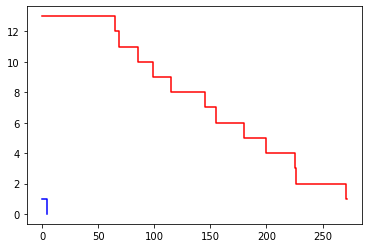

In [25]:
df = df1.loc[df1['type'] == 'normal']
X = df.drop(columns=['samples', 'type'])
d = squareform(pdist(X, "euclidean"))

# getting a distance object
c_dist = sr.Distance(d)

# getting h0sr
f = c_dist.get_h0sr(clustering_method = "complete", reduced = False)

#getting bar codes
b = c_dist.get_bc(maxdim=1)


#getting h1sr

g = sr.bc_to_sr(b, degree="H1")

f.plot(color="red")
g.plot(color="blue")

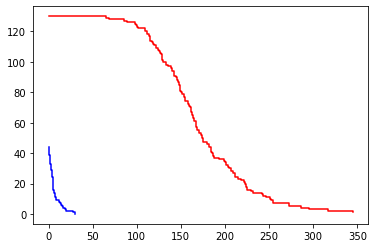

In [6]:
X = df1.drop(columns=['samples  ', 'type'])

# array of the Euclidean distances
d = squareform(pdist(X, "euclidean"))

# getting a distance object
c_dist = sr.Distance(d)

# getting h0sr
f = c_dist.get_h0sr(clustering_method = "complete", reduced = False)

#getting bar codes
b = c_dist.get_bc(maxdim=1)


#getting h1sr

g = sr.bc_to_sr(b, degree="H1")

f.plot(color="red")
g.plot(color="blue")